In [2]:
import os
import numpy as np
import qci_client as qc

import os
import numpy as np
import qci_client as qc

# Configurar QCI API 
os.environ['QCI_API_URL'] = 'https://api.qci-prod.com'  
os.environ['QCI_TOKEN'] = '5139207bc4dc31cd87bc18a7c1598457'

# Definir el tamaño del tablero 
size = 4  

# Valor de penalización Lagrangiana
lagrange = size ** 2  

# Crear la matriz QUBO para el problema de N reinas
Q = np.zeros((size * size, size * size))

# Restricción: Solo una reina por fila
for i in range(size):
    for j in range(size):
        Q[i * size + j, i * size + j] -= 1
        for k in range(j + 1, size):
            # Aseguramos simetría entre Q[i, j] y Q[j, i]
            Q[i * size + j, i * size + k] += 2
            Q[i * size + k, i * size + j] += 2  # Asegurar simetría

# Restricción: Solo una reina por columna
for j in range(size):
    for i in range(size):
        for k in range(i + 1, size):
            # Aseguramos simetría entre Q[i, j] y Q[k, j]
            Q[i * size + j, k * size + j] += 2
            Q[k * size + j, i * size + j] += 2  # Asegurar simetría

# Restricción: Diagonales principales y secundarias
for i in range(size):
    for j in range(size):
        for k in range(1, size - max(i, j)):
            # Aseguramos simetría entre Q[i, j] y Q[(i + k), (j + k)]
            Q[i * size + j, (i + k) * size + (j + k)] += 2
            Q[(i + k) * size + (j + k), i * size + j] += 2  # Asegurar simetría

        for k in range(1, min(i, size - j)):
            # Aseguramos simetría entre Q[i, j] y Q[(i - k), (j + k)]
            Q[i * size + j, (i - k) * size + (j + k)] += 2
            Q[(i - k) * size + (j + k), i * size + j] += 2  # Asegurar simetría

# Verificar si la matriz es simétrica
print("Matriz QUBO generada:")
print(Q)
print(f"La matriz QUBO es simétrica: {np.allclose(Q, Q.T)}")


Matriz QUBO generada:
[[-1.  2.  2.  2.  2.  2.  0.  0.  2.  0.  2.  0.  2.  0.  0.  2.]
 [ 2. -1.  2.  2.  0.  2.  2.  0.  0.  2.  0.  2.  0.  2.  0.  0.]
 [ 2.  2. -1.  2.  0.  0.  2.  2.  0.  0.  2.  0.  0.  0.  2.  0.]
 [ 2.  2.  2. -1.  0.  0.  0.  2.  0.  0.  0.  2.  0.  0.  0.  2.]
 [ 2.  0.  0.  0. -1.  2.  2.  2.  2.  2.  0.  0.  2.  0.  2.  0.]
 [ 2.  2.  0.  0.  2. -1.  2.  2.  2.  2.  2.  0.  0.  2.  0.  2.]
 [ 0.  2.  2.  0.  2.  2. -1.  2.  0.  2.  2.  2.  2.  0.  2.  0.]
 [ 0.  0.  2.  2.  2.  2.  2. -1.  0.  0.  2.  2.  0.  2.  0.  2.]
 [ 2.  0.  0.  0.  2.  2.  0.  0. -1.  2.  2.  2.  2.  2.  0.  0.]
 [ 0.  2.  0.  0.  2.  2.  2.  0.  2. -1.  2.  2.  2.  2.  2.  0.]
 [ 2.  0.  2.  0.  0.  2.  2.  2.  2.  2. -1.  2.  0.  2.  2.  2.]
 [ 0.  2.  0.  2.  0.  0.  2.  2.  2.  2.  2. -1.  0.  0.  2.  2.]
 [ 2.  0.  0.  0.  2.  0.  2.  0.  2.  2.  0.  0. -1.  2.  2.  2.]
 [ 0.  2.  0.  0.  0.  2.  0.  2.  2.  2.  2.  0.  2. -1.  2.  2.]
 [ 0.  0.  2.  0.  2.  0.  2.  0.  0.  2

In [1]:
import os
import numpy as np
import qci_client as qc

import os
import numpy as np
import qci_client as qc

# Configurar QCI API 
os.environ['QCI_API_URL'] = 'https://api.qci-prod.com'  
os.environ['QCI_TOKEN'] = '5139207bc4dc31cd87bc18a7c1598457'


# Configurar el tamaño del tablero de N reinas
size = 4
lagrange = size ** 2

# Función para convertir índices (i, j) a un índice lineal
def to_linear_index(i, j, size):
    return i * size + j

# Crear una matriz QUBO simétrica
num_variables = size * size
Q_matrix = np.zeros((num_variables, num_variables))

# Llenar la matriz QUBO siguiendo las mismas reglas que en dimod
for i in range(size):
    for j in range(size):
        linear_idx = to_linear_index(i, j, size)
        Q_matrix[linear_idx, linear_idx] = -1 

# Fijar la reina en la posición (fixed_row, fixed_col)
idx_fixed = to_linear_index(fixed_row, fixed_col, size)
Q_matrix[idx_fixed, idx_fixed] = -lagrange * 2

for i1 in range(size):
    for j1 in range(size):
        for i2 in range(size):
            for j2 in range(size):
                if (i1 == i2 or j1 == j2 or abs(i1 - i2) == abs(j1 - j2)) and not (i1 == i2 and j1 == j2):
                    idx1 = to_linear_index(i1, j1, size)
                    idx2 = to_linear_index(i2, j2, size)
                    # Asegurar simetría: Q[idx1, idx2] = Q[idx2, idx1] = lagrange
                    Q_matrix[idx1, idx2] += lagrange
                    Q_matrix[idx2, idx1] += lagrange  # <--- Esto garantiza simetría

# Verificar simetría
print("Matriz QUBO es simétrica:", np.allclose(Q_matrix, Q_matrix.T))


Matriz QUBO es simétrica: True


In [3]:
import time

# Crear el cliente QCI
client = qc.QciClient()

# Definir el archivo QUBO
file_def = {
    "file_name": "n-queens-qubo",
    "file_config": {
        "qubo": {
            "data": Q_matrix
        }
    }
}

# Subir el archivo QUBO a QCI
response = client.upload_file(file=file_def)
file_id = response["file_id"]
print(f"Archivo subido con ID: {file_id}")

# Crear y enviar el trabajo a QCI
job_body = client.build_job_body(
    job_type="sample-qubo",
    qubo_file_id=file_id,
    job_params={"device_type": "dirac-1", "num_samples": 50}
)
job_response = client.process_job(job_body=job_body)

# Obtener el ID del trabajo
job_id = job_response.get("job_info", {}).get("job_id", "Desconocido")
print(f"Trabajo enviado con ID: {job_id}")


Archivo subido con ID: 67cec1345e0855263227b722
2025-03-10 11:38:45 - Dirac allocation balance = 537 s
2025-03-10 11:38:45 - Job submitted: job_id='67cec1356f2d98bd02a337d3'
2025-03-10 11:38:45 - QUEUED
2025-03-10 11:38:48 - RUNNING
2025-03-10 11:50:13 - COMPLETED
2025-03-10 11:50:16 - Dirac allocation balance = 524 s
Trabajo enviado con ID: 67cec1356f2d98bd02a337d3


In [4]:
# Monitorear el estado del trabajo
job_status = client.get_job_status(job_id=job_id)
while job_status["status"] not in ["COMPLETED", "FAILED"]:
    print(f"Estado del trabajo: {job_status['status']}")
    print(job_status)
    time.sleep(5)
    job_status = client.get_job_status(job_id=job_id)

# Obtener y mostrar resultados
if job_status["status"] == "COMPLETED":
    results = client.get_job_results(job_id=job_id)
    print("Resultados obtenidos:")
    print(results)
else:
    print("El trabajo falló.")

Resultados obtenidos:
{'job_info': {'job_id': '67cec1356f2d98bd02a337d3', 'job_submission': {'problem_config': {'quadratic_unconstrained_binary_optimization': {'qubo_file_id': '67cec1345e0855263227b722'}}, 'device_config': {'dirac-1': {'num_samples': 50}}}, 'job_status': {'submitted_at_rfc3339nano': '2025-03-10T10:38:45.303Z', 'queued_at_rfc3339nano': '2025-03-10T10:38:45.31Z', 'running_at_rfc3339nano': '2025-03-10T10:38:45.947Z', 'completed_at_rfc3339nano': '2025-03-10T10:50:11.598Z'}, 'job_result': {'file_id': '67cec3e35e0855263227b724', 'device_usage_s': 13}}, 'status': 'COMPLETED', 'results': {'counts': [26, 24], 'energies': [-4, -4], 'solutions': [[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]]}}


In [5]:
solutions = results["results"]["solutions"]
print(solutions)

[[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]]


In [6]:
best_solution = solutions[0]  
print(best_solution)

[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]


In [7]:
# Función para visualizar una solución en un tablero
def plot_board(solution, size=4):
    board = np.array(solution).reshape(size, size)
    print(" --------------- ")
    for i in range(size):
        print("|", end="")
        for j in range(size):
            if board[i][j] == 0:
                print("   |", end="") 
            else:
                print(" X |", end="") 
        print()
        print(" --------------- ")




# Mostrar la mejor solución en el tablero
print("Visualizando la mejor solución:")
plot_board(best_solution, size=4)


Visualizando la mejor solución:
 --------------- 
|   | X |   |   |
 --------------- 
|   |   |   | X |
 --------------- 
| X |   |   |   |
 --------------- 
|   |   | X |   |
 --------------- 


In [1]:
# Función para visualizar una solución en un tablero
def plot_board(solution, size=4):
    board = np.array(solution).reshape(size, size)
    print(" --------------- ")
    for i in range(size):
        print("|", end="")
        for j in range(size):
            if board[i][j] == 0:
                print("   |", end="") 
            else:
                print(" X |", end="") 
        print()
        print(" --------------- ")




# Mostrar la mejor solución en el tablero
print("Visualizando la mejor solución:")
plot_board([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], size=4)


Visualizando la mejor solución:


NameError: name 'np' is not defined

In [4]:
import numpy as np

results = {
    'job_info': {
        'job_result': {'device_usage_s': 13}
    },
    'results': {
        'counts': [26, 24],
        'energies': [-4, -4],
        'solutions': [
            [0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
            [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
        ]
    }
}

# Extraer datos
device_time_s = results['job_info']['job_result']['device_usage_s']
counts = results['results']['counts']
solutions = results['results']['solutions']
num_shots = sum(counts)

# Tiempo por muestra en ms
t_sample = (device_time_s * 1000) / num_shots

# Identificar las soluciones óptimas (energía mínima)
min_energy = min(results['results']['energies'])
opt_solutions = [tuple(sol) for sol, e in zip(solutions, results['results']['energies']) if e == min_energy]

# Contar ocurrencias totales y ocurrencias de soluciones óptimas
count_dict = {tuple(sol): count for sol, count in zip(solutions, counts)}
success_counts = sum(count_dict.get(sol, 0) for sol in opt_solutions)
total_counts = sum(count_dict.values())

# Calcular P_GS
p_gs = success_counts / total_counts

# Calcular TTS
if p_gs == 1.0:
    tts = t_sample
elif p_gs == 0:
    tts = float('inf')
else:
    tts = t_sample * (np.log(1 - 0.99) / np.log(1 - p_gs))

print(f"Tiempo por muestra (t_sample): {t_sample:.3f} ms")
print(f"P_GS: {p_gs:.3f}")
print(f"TTS: {tts:.3f} ms")


Tiempo por muestra (t_sample): 260.000 ms
P_GS: 1.000
TTS: 260.000 ms


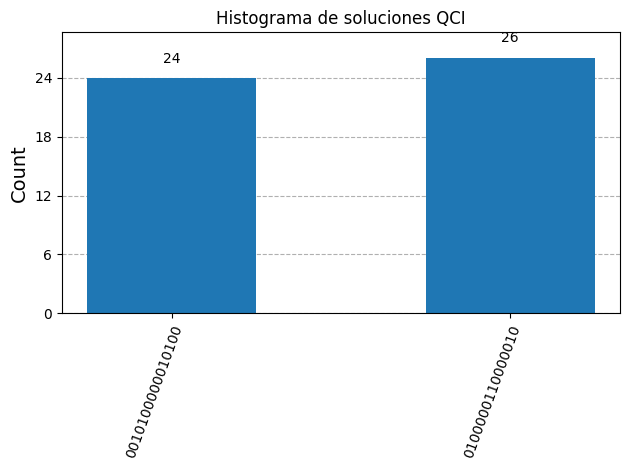

In [5]:
from qiskit.visualization import plot_histogram

# Formatear counts para Qiskit: claves como strings, valores como ocurrencias
formatted_counts = {"".join(str(bit) for bit in sol): count for sol, count in count_dict.items()}

# Graficar histograma
plot_histogram(formatted_counts, title="Histograma de soluciones QCI")
